## Dependencies & Setup

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.pyplot as inline
%matplotlib inline
import seaborn as sns

## Load Oil Prices Data
### Data Source: https://www.kaggle.com/usdot/pipeline-accidents

In [2]:
# Paths to Oil DOW Prices Data File
oil_dow_prices_file = "../data/oil_dow_prices.csv"

# Read the data file using Pandas
oil_prices_original = pd.read_csv(oil_dow_prices_file)

## Cleanup & Inspect Oil Prices Data

In [3]:
# Drop unwanted columns from Oil Prices DataFrame
oil_prices_dropped = oil_prices_original.drop(['Unnamed: 0', 'Close Price'], axis=1)
# Rename columns
oil_prices_new = oil_prices_dropped.rename(columns = {'date':'Price Date', 'Crude_Oil_Price':'Crude Oil Price'})
# Add a new column for Price Year-Month
oil_prices_new['Price Year-Month'] = pd.to_datetime(oil_prices_new['Price Date']).dt.to_period('M')

# Filter for oil prices between 2005 and 2020 and create a clean new DataFrame
start_date = "2005-01-01"
end_date = "2020-01-01"
oil_prices_clean = oil_prices_new.loc[(oil_prices_new['Price Date'] >= start_date) & (oil_prices_new['Price Date'] <= end_date)]
oil_prices_clean.drop(['Price Date'], axis=1, inplace=True)
oil_prices_clean.reset_index(drop=True, inplace=True)
oil_prices_clean.info()
print(oil_prices_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
Crude Oil Price     181 non-null float64
Price Year-Month    181 non-null period[M]
dtypes: float64(1), period[M](1)
memory usage: 3.0 KB
     Crude Oil Price Price Year-Month
0              40.18          2005-01
1              42.19          2005-02
2              47.56          2005-03
3              47.26          2005-04
4              44.03          2005-05
..               ...              ...
176            55.07          2019-09
177            53.14          2019-10
178            54.96          2019-11
179            58.41          2019-12
180            56.86          2020-01

[181 rows x 2 columns]


## Load US Auto Industry Sales Data
### Data Sources:
    1) https://www.goodcarbadcar.net/usa-auto-industry-total-sales-figures/#monthly
    2) http://www.bea.gov/

In [4]:
# Paths to Oil DOW Prices Data File
auto_sales_file = "../data/us_auto_industry_sales_2005-2020.csv"

# Read the data file using Pandas
auto_sales_data = pd.read_csv(auto_sales_file)

In [5]:
auto_sales_data['Year-Month of Sale'] = pd.to_datetime(auto_sales_data['Year-Month of Sale']).dt.to_period('M')

auto_sales_data

,Year-Month of Sale,Total Auto Sales
0,2005-01,1052224
1,2005-02,1244753
2,2005-03,1564938
3,2005-04,1493837
4,2005-05,1488171
...,...,...
179,2019-12,1459164
180,2020-01,1147041
181,2020-02,1425494
182,2020-03,903194


In [6]:
# Merge the Oil Prices and Auto Sales DataFrames
oil_prices_auto_sales = pd.merge(oil_prices_clean, auto_sales_data, how='inner', left_on='Price Year-Month', right_on='Year-Month of Sale')

oil_prices_auto_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 180
Data columns (total 4 columns):
Crude Oil Price       181 non-null float64
Price Year-Month      181 non-null period[M]
Year-Month of Sale    181 non-null period[M]
Total Auto Sales      181 non-null int64
dtypes: float64(1), int64(1), period[M](2)
memory usage: 7.1 KB


In [7]:
# Drop duplicate Year-Month column from the merged DataFrame
oil_prices_auto_sales_new = oil_prices_auto_sales.drop(['Price Year-Month'], axis=1)
oil_prices_auto_sales_new

,Crude Oil Price,Year-Month of Sale,Total Auto Sales
0,40.18,2005-01,1052224
1,42.19,2005-02,1244753
2,47.56,2005-03,1564938
3,47.26,2005-04,1493837
4,44.03,2005-05,1488171
...,...,...,...
176,55.07,2019-09,1282712
177,53.14,2019-10,1384010
178,54.96,2019-11,1445173
179,58.41,2019-12,1459164


In [8]:
# Rename Year-Month column
oil_prices_auto_sales_clean = oil_prices_auto_sales_new.rename(columns = {'Year-Month of Sale':'Year-Month'})
oil_prices_auto_sales_clean

,Crude Oil Price,Year-Month,Total Auto Sales
0,40.18,2005-01,1052224
1,42.19,2005-02,1244753
2,47.56,2005-03,1564938
3,47.26,2005-04,1493837
4,44.03,2005-05,1488171
...,...,...,...
176,55.07,2019-09,1282712
177,53.14,2019-10,1384010
178,54.96,2019-11,1445173
179,58.41,2019-12,1459164


## Plot Linear Regression for Oil Prices vs Total Auto Sales

Text(30, -5, 'y =-2292.21x + 1437451.75')

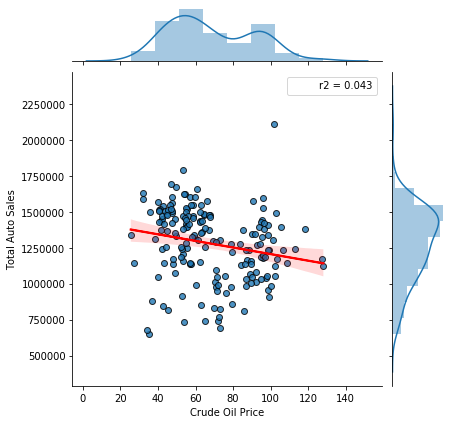

In [9]:
# Function to calculate r-square  
def r2(x, y):
    return st.pearsonr(x, y)[0] ** 2

# Draw Scatter Plot to show relationship between Total Auto Sales & Oil Prices 
sns.jointplot(x="Crude Oil Price", y="Total Auto Sales", data=oil_prices_auto_sales_clean, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

y_values = oil_prices_auto_sales_clean["Total Auto Sales"]
x_values = oil_prices_auto_sales_clean["Crude Oil Price"]

# Calculate the linear regression model between Total Auto Sales and Crude Oil Prices
# The stats.lingress function returns the slope, intercept, r-value, p-value and stderr 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Compute and store the regression values for the Total Auto Sales
regress_values = x_values * slope + intercept

# Capture the linear regression line equation in the form: y = mx + c
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,-5),fontsize=12,color="red")

## Linear Regression Model of Oil Prices vs Total Auto Sales
### Can we predict the Number of Total Auto Sales based on Oil Price trends?

In [10]:
# Assign the data to respective x and y variables

oil_prices_x = oil_prices_auto_sales_clean["Crude Oil Price"].values.reshape(-1,1)
auto_sales_y = oil_prices_auto_sales_clean["Total Auto Sales"].values.reshape(-1,1)
print(oil_prices_x.shape, auto_sales_y.shape)

(181, 1) (181, 1)


In [11]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Fit the model to existing data

model.fit(oil_prices_x, auto_sales_y)
print(model)

# Print the coefficient and the intercept for the model
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Weight coefficients:  [[-2292.20903549]]
y-axis intercept:  [1437451.75435043]


In [13]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split
oil_prices_x_train, oil_prices_x_test, auto_sales_y_train, auto_sales_y_test = train_test_split(oil_prices_x, auto_sales_y, random_state=42)

In [14]:
# Fit the model to training data and calculate the scores for the training and testing data
# Note: This is the training step where you fit the line to the data.

model.fit(oil_prices_x_train, auto_sales_y_train)
training_score = model.score(oil_prices_x_train, auto_sales_y_train)
testing_score = model.score(oil_prices_x_test, auto_sales_y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.03800601995152176
Testing Score: 0.029873080694839852


R2 Score: 0.02987308069483985



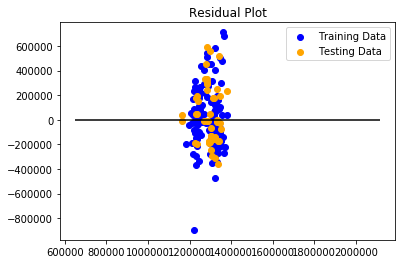

In [15]:
# Plot the Residuals for the Training and Testing data
from sklearn.metrics import r2_score

plt.scatter(model.predict(oil_prices_x_train), model.predict(oil_prices_x_train) - auto_sales_y_train, c="blue", label="Training Data")
plt.scatter(model.predict(oil_prices_x_test), model.predict(oil_prices_x_test) - auto_sales_y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=auto_sales_y.min(), xmax=auto_sales_y.max())
plt.title("Residual Plot")

print(f"R2 Score: {r2_score(auto_sales_y_test,model.predict(oil_prices_x_test))}\n")

## Load US Auto Industry Sales Data By Segment (Passenger Cars & Light Trucks)
### Data Source: https://www.marklines.com/en/

In [16]:
# Paths to Oil DOW Prices Data File
auto_sales_segments_file = "../data/us_auto_sales_by_segment_2019-2014.csv"

# Read the data file using Pandas
auto_sales_segments_data = pd.read_csv(auto_sales_segments_file)

In [17]:
auto_sales_segments_data['Year-Month of Sale'] = pd.to_datetime(auto_sales_segments_data['Year-Month of Sale']).dt.to_period('M')

auto_sales_segments_data

,Vehicle Type,Year-Month of Sale,Total Auto Sales
0,Passenger Cars,2019-01,361908
1,Light Trucks,2019-01,771003
2,Passenger Cars,2018-01,379967
3,Light Trucks,2018-01,774918
4,Passenger Cars,2019-02,386806
...,...,...,...
139,Light Trucks,2014-11,704486
140,Passenger Cars,2015-12,656261
141,Light Trucks,2015-12,987028
142,Passenger Cars,2014-12,678154


In [18]:
# Merge the Oil Prices and Auto Sales DataFrames
oil_prices_auto_segments_sales = pd.merge(oil_prices_clean, auto_sales_segments_data, how='inner', left_on='Price Year-Month', right_on='Year-Month of Sale')

oil_prices_auto_segments_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 5 columns):
Crude Oil Price       144 non-null float64
Price Year-Month      144 non-null period[M]
Vehicle Type          144 non-null object
Year-Month of Sale    144 non-null period[M]
Total Auto Sales      144 non-null int64
dtypes: float64(1), int64(1), object(1), period[M](2)
memory usage: 6.8+ KB


In [19]:
# Inspect Merged DataFrame
oil_prices_auto_segments_sales

,Crude Oil Price,Price Year-Month,Vehicle Type,Year-Month of Sale,Total Auto Sales
0,89.57,2014-01,Passenger Cars,2014-01,491724
1,89.57,2014-01,Light Trucks,2014-01,520858
2,96.86,2014-02,Passenger Cars,2014-02,581991
3,96.86,2014-02,Light Trucks,2014-02,611881
4,96.17,2014-03,Passenger Cars,2014-03,763170
...,...,...,...,...,...
139,53.14,2019-10,Light Trucks,2019-10,988576
140,54.96,2019-11,Passenger Cars,2019-11,377408
141,54.96,2019-11,Light Trucks,2019-11,1036106
142,58.41,2019-12,Passenger Cars,2019-12,394178


In [20]:
# Drop duplicate Year-Month column from the merged DataFrame
oil_prices_auto_segments_sales_new = oil_prices_auto_segments_sales.drop(['Price Year-Month'], axis=1)
oil_prices_auto_segments_sales_new

,Crude Oil Price,Vehicle Type,Year-Month of Sale,Total Auto Sales
0,89.57,Passenger Cars,2014-01,491724
1,89.57,Light Trucks,2014-01,520858
2,96.86,Passenger Cars,2014-02,581991
3,96.86,Light Trucks,2014-02,611881
4,96.17,Passenger Cars,2014-03,763170
...,...,...,...,...
139,53.14,Light Trucks,2019-10,988576
140,54.96,Passenger Cars,2019-11,377408
141,54.96,Light Trucks,2019-11,1036106
142,58.41,Passenger Cars,2019-12,394178


In [21]:
# Rename Year-Month column
oil_prices_auto_segments_sales_clean = oil_prices_auto_segments_sales_new.rename(columns = {'Year-Month of Sale':'Year-Month'})

# Save DF to csv file
oil_prices_auto_segments_sales_clean.to_csv("../data/oil_prices_auto_segments_sales_summary.csv",index=False)

oil_prices_auto_segments_sales_clean

,Crude Oil Price,Vehicle Type,Year-Month,Total Auto Sales
0,89.57,Passenger Cars,2014-01,491724
1,89.57,Light Trucks,2014-01,520858
2,96.86,Passenger Cars,2014-02,581991
3,96.86,Light Trucks,2014-02,611881
4,96.17,Passenger Cars,2014-03,763170
...,...,...,...,...
139,53.14,Light Trucks,2019-10,988576
140,54.96,Passenger Cars,2019-11,377408
141,54.96,Light Trucks,2019-11,1036106
142,58.41,Passenger Cars,2019-12,394178


In [22]:
# Filter Merged DataFrame by Vehicle Type
passenger_cars = oil_prices_auto_segments_sales_clean[oil_prices_auto_segments_sales_clean['Vehicle Type'] == 'Passenger Cars']
print(passenger_cars.head())

light_trucks = oil_prices_auto_segments_sales_clean[oil_prices_auto_segments_sales_clean['Vehicle Type'] == 'Light Trucks']
print(light_trucks.head())

Crude Oil Price    Vehicle Type Year-Month  Total Auto Sales
0            89.57  Passenger Cars    2014-01            491724
2            96.86  Passenger Cars    2014-02            581991
4            96.17  Passenger Cars    2014-03            763170
6            96.49  Passenger Cars    2014-04            676274
8            95.74  Passenger Cars    2014-05            794084
   Crude Oil Price  Vehicle Type Year-Month  Total Auto Sales
1            89.57  Light Trucks    2014-01            520858
3            96.86  Light Trucks    2014-02            611881
5            96.17  Light Trucks    2014-03            774118
7            96.49  Light Trucks    2014-04            714239
9            95.74  Light Trucks    2014-05            814609


## Plot Linear Regression for Oil Prices vs Auto Sales by Segment

### Linear Regression for Passenger Car Sales & Oil Prices

Text(30, -5, 'y =979.29x + 494831.26')

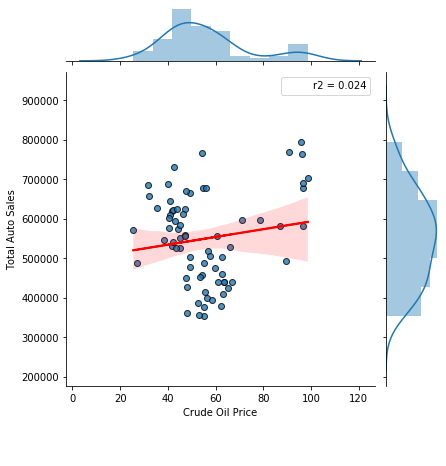

In [23]:
# Function to calculate r-square  
def r2(x, y):
    return st.pearsonr(x, y)[0] ** 2

# Draw Scatter Plot to show relationship between Total Auto Sales & Oil Prices 
sns.jointplot(x="Crude Oil Price", y="Total Auto Sales", data=passenger_cars, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

y_values = passenger_cars["Total Auto Sales"]
x_values = passenger_cars["Crude Oil Price"]

# Calculate the linear regression model between Total Auto Sales and Crude Oil Prices
# The stats.lingress function returns the slope, intercept, r-value, p-value and stderr 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Compute and store the regression values for the Total Auto Sales
regress_values = x_values * slope + intercept

# Capture the linear regression line equation in the form: y = mx + c
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,-5),fontsize=12,color="red")

### Linear Regression for Light Trucks Sales & Oil Prices

Text(30, -5, 'y =-2053.88x + 997930.5')

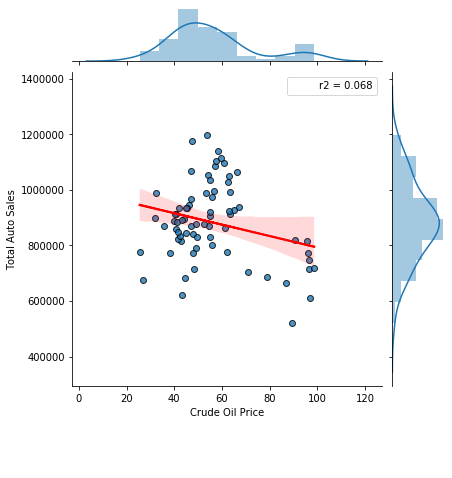

In [24]:
# Function to calculate r-square  
def r2(x, y):
    return st.pearsonr(x, y)[0] ** 2

# Draw Scatter Plot to show relationship between Total Auto Sales & Oil Prices 
sns.jointplot(x="Crude Oil Price", y="Total Auto Sales", data=light_trucks, kind="reg", scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'}, stat_func=r2)

y_values = light_trucks["Total Auto Sales"]
x_values = light_trucks["Crude Oil Price"]

# Calculate the linear regression model between Total Auto Sales and Crude Oil Prices
# The stats.lingress function returns the slope, intercept, r-value, p-value and stderr 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Compute and store the regression values for the Total Auto Sales
regress_values = x_values * slope + intercept

# Capture the linear regression line equation in the form: y = mx + c
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,-5),fontsize=12,color="red")